In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix




In [3]:
df=pd.read_excel("/content/drive/MyDrive/Excelr/Assignments/DataSets/glass.xlsx",sheet_name=1)

In [4]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


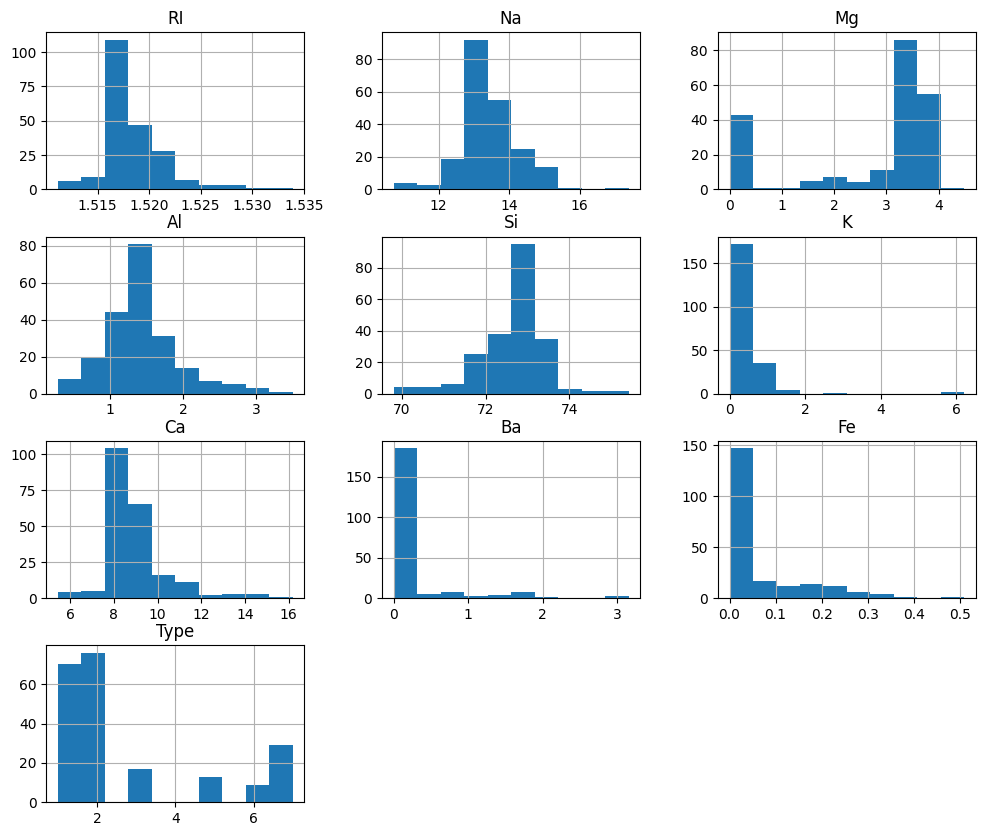

In [8]:
# Histograms
df.hist(figsize=(12,10))
plt.show()


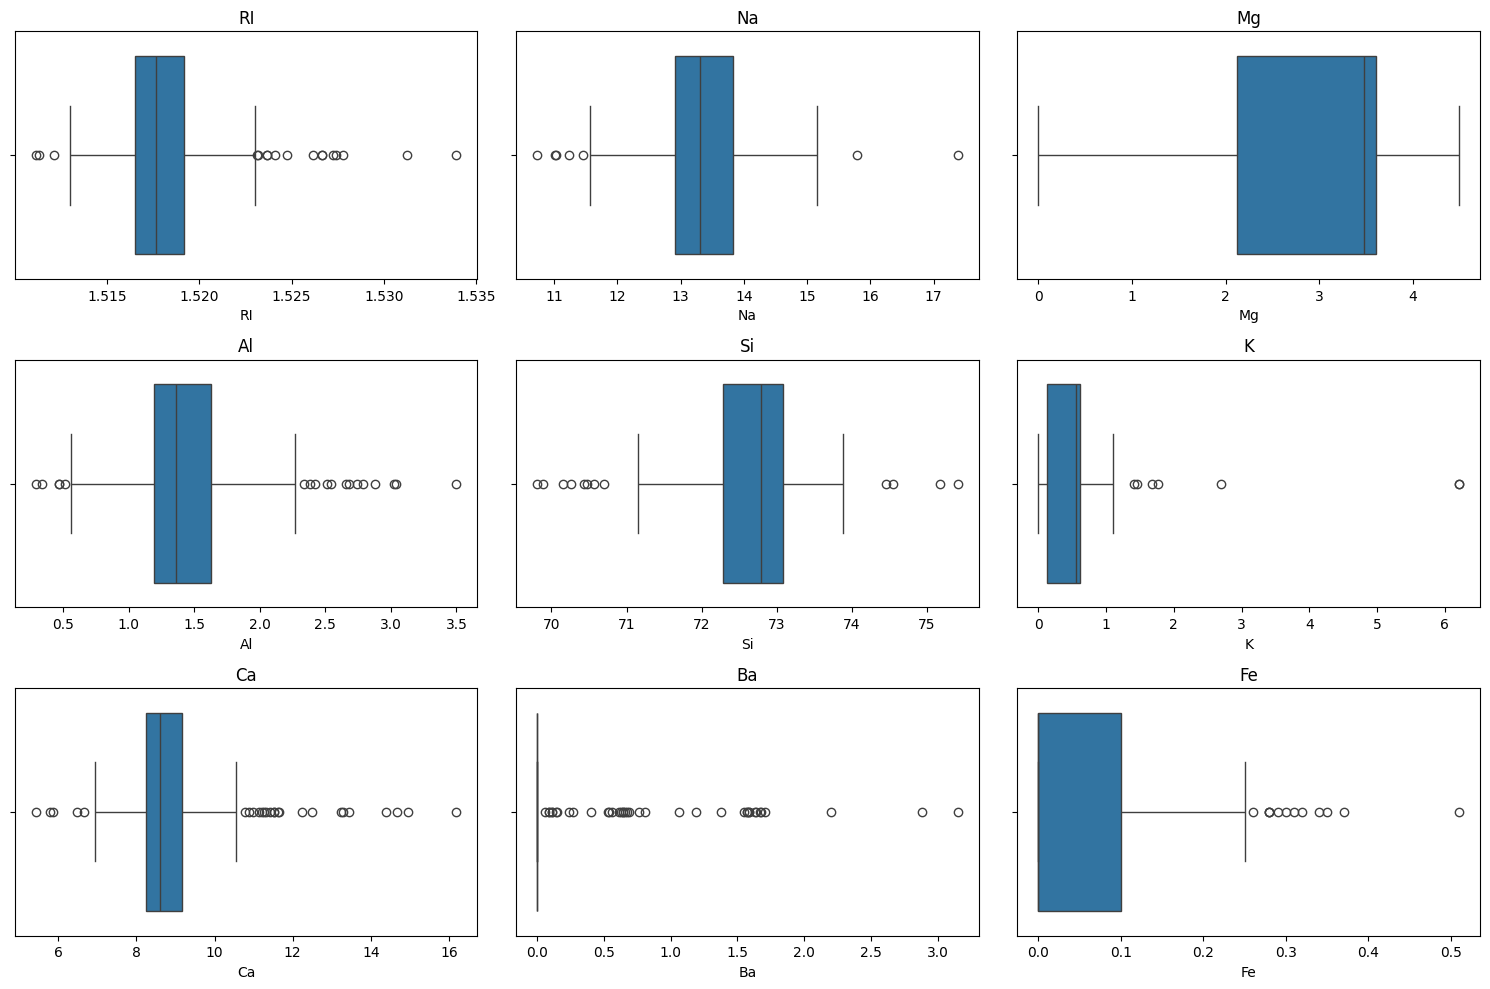

In [9]:
# Boxplots
plt.figure(figsize=(15,10))
for i, col in enumerate(df.drop(columns=['Type']).columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


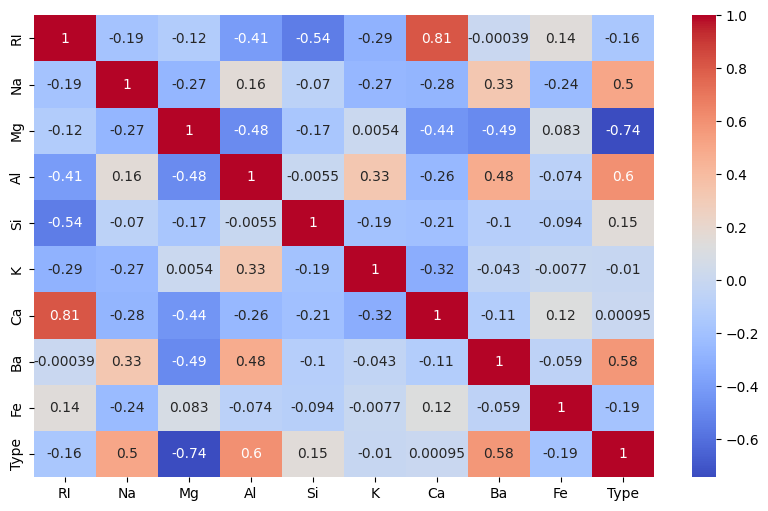

In [10]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [11]:
# Features & target
X = df.drop(columns=['Type'])
y = df['Type']


In [12]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [13]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
# 5. Random Forest Model

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.813953488372093


In [16]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.85      0.73      0.79        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.81        43
   macro avg       0.82      0.82      0.81        43
weighted avg       0.83      0.81      0.81        43



In [17]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[12  1  1  0  0  0]
 [ 3 11  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


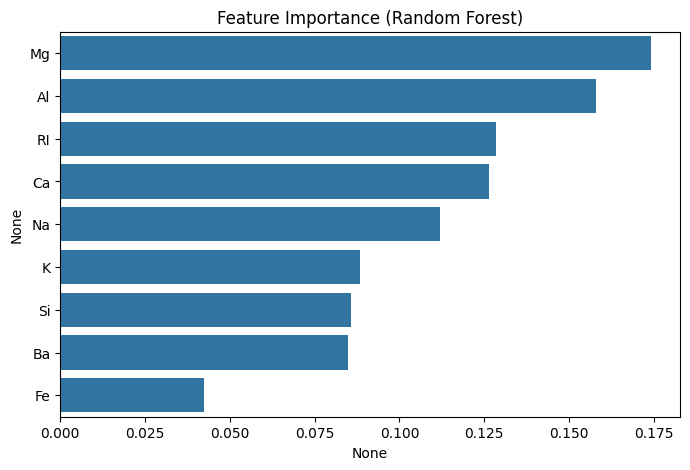

In [18]:
# Feature importance
importances = pd.Series(rf.feature_importances_, index=df.drop(columns=['Type']).columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [19]:
# Bagging
bagging = BaggingClassifier(
    estimator=RandomForestClassifier(random_state=42),
    n_estimators=50,
    random_state=42
)

In [20]:
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)


In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred_bag))



Accuracy: 0.7906976744186046


In [22]:
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.75      0.80      0.77        15
           3       1.00      0.33      0.50         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.79        43
   macro avg       0.86      0.75      0.76        43
weighted avg       0.82      0.79      0.79        43



In [23]:

# AdaBoost
adaboost = AdaBoostClassifier(
    estimator=RandomForestClassifier(n_estimators=10, random_state=42),
    n_estimators=50,
    random_state=42
)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)


In [24]:

print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))


Accuracy: 0.813953488372093
              precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           2       0.85      0.73      0.79        15
           3       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.81        43
   macro avg       0.82      0.86      0.84        43
weighted avg       0.82      0.81      0.81        43



In [25]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred_gb))


Accuracy: 0.813953488372093


In [27]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           1       0.83      0.71      0.77        14
           2       0.81      0.87      0.84        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.81        43
   macro avg       0.81      0.82      0.80        43
weighted avg       0.82      0.81      0.81        43



**1. Explain Bagging and Boosting methods. How is it different from each other.**

**Bagging (Bootstrap Aggregating):**

Builds multiple models on different random samples (bootstraps) of the data.

* Models are trained independently in parallel.

*   Final prediction = average (regression) or majority vote (classification).







*  Example: Random Forest (Bagging applied to Decision Trees).
*   Helps reduce variance, prevents overfitting.





**Boosting:**

*   Builds models sequentially, where each new model focuses on correcting the errors of the previous one.

*  Models are trained dependently.
*   Assigns higher weights to misclassified samples.


*   Examples: AdaBoost, Gradient Boosting, XGBoost, LightGBM.



*   Helps reduce bias and improve accuracy.












**2. Explain how to handle imbalance in the data.**

Resampling: Oversample minority class (SMOTE) or undersample majority class.

Class Weights: Adjust weights in model (class_weight="balanced" in sklearn).

Evaluation Metrics: Use precision, recall, F1, ROC-AUC instead of accuracy.